In [1]:
from preprocessing import *
from import_data import *
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/sess2/'
mi_dir = data_dir + 'MI/sess2/'
bci_dir1 = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-02-28_12-03-49/'
bci_dir2 = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-03-10_14-09-51/'
col_names = ['Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']

In [2]:
ssvep_files = get_files(ssvep_dir)
#ssvep_files = [ssvep_files[i] for i in range(len(ssvep_files)) if (i+1)%11!=0]
mi_files = get_files(mi_dir)
#mi_files = [mi_files[i] for i in range(len(mi_files)) if (i+1)%6!=0]
bci1_files = get_files(bci_dir1)
bci2_files = get_files(bci_dir2)

In [11]:
for i, fi in enumerate(mi_files):
    print("{}: {}".format(i,fi))

0: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_MILF.txt
1: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_MIRF.txt
2: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_MISw.txt
3: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_MITy.txt
4: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_NOMI.txt
5: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_baseline.txt
6: DataCollection/outputs/MI/sess2/2023-03-10T14:10:37.683875_MI_metadata.txt
7: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_MILF.txt
8: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_MIRF.txt
9: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_MISw.txt
10: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_MITy.txt
11: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_NOMI.txt
12: DataCollection/outputs/MI/sess2/2023-03-10T14:51:16.448841_MI_baseline.txt
13: DataCollection/outp

In [5]:
eeg, Fs = process_eeg(ssvep_files[2], col_names, bci2_files[1], low=2.0)

In [6]:
def plot_ssvep(eeg):
    for chan in eeg.columns:
            plt.figure()
            #plt.xlim(4,5)
            plot_channel(eeg, chan, Fs)

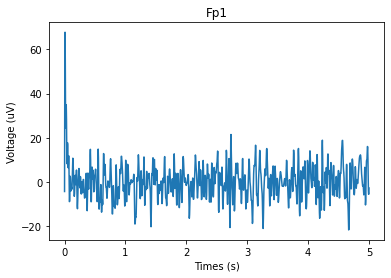

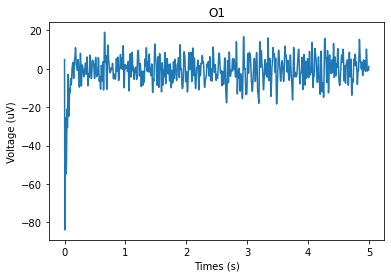

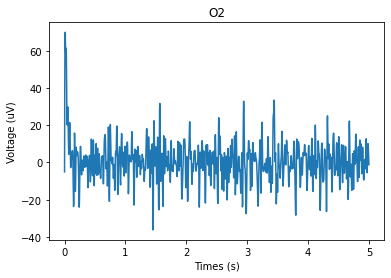

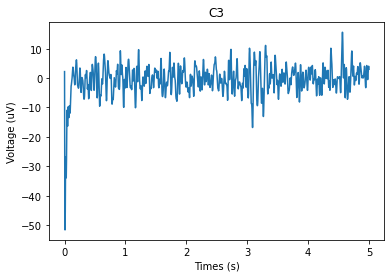

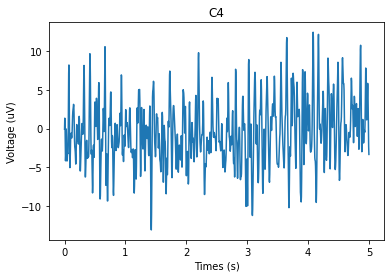

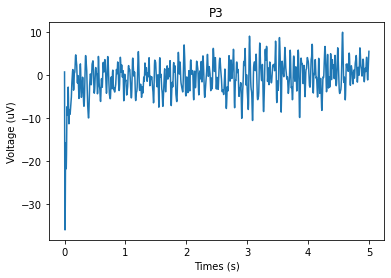

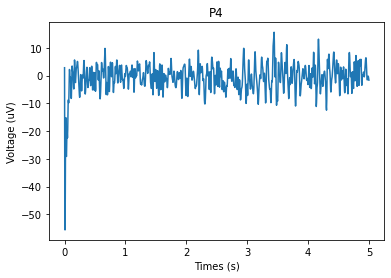

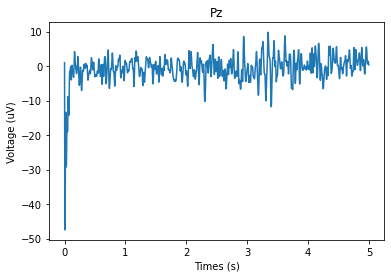

In [7]:
plot_ssvep(eeg)

In [8]:
def plot_mi(eeg):
    for chan in eeg.columns:
        for i in range(4):
            plt.figure()
            plt.xlim(i*5+0.5,(i+1)*5-0.5)
            plot_channel(eeg, chan, Fs, start=i*5, end=(i+1)*5)

In [14]:
eeg, Fs = process_eeg(mi_files[0], col_names, bci2_files[1], low=2)

In [15]:
eeg_np = eeg.to_numpy()
eeg_np.shape

(4750, 8)

In [11]:
train_data = np.array([eeg_np[i*1250:(i+1)*1250].reshape(8,1000) for i in range(4)])
train_data.shape

ValueError: cannot reshape array of size 10000 into shape (8,1000)

/var/folders/r5/gg5z6rvn6bb70r67y0ntjw8w0000gn/T/ipykernel_42045/1370952241.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


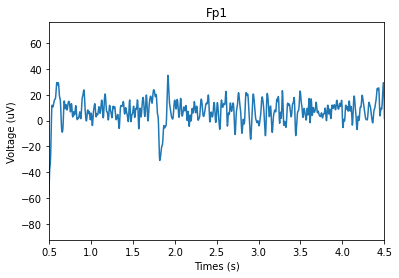

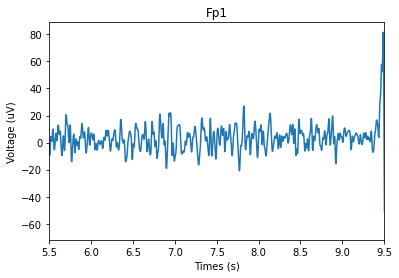

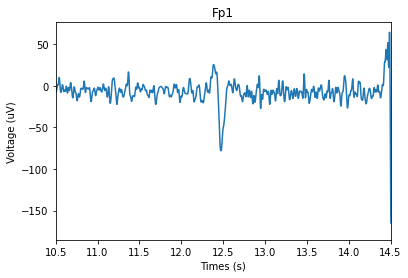

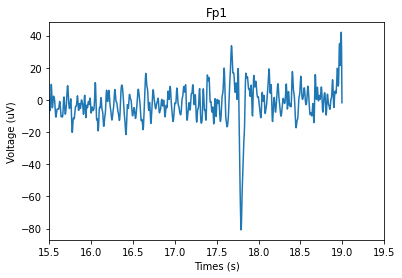

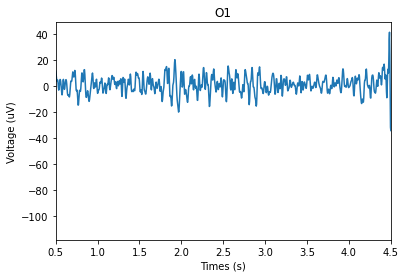

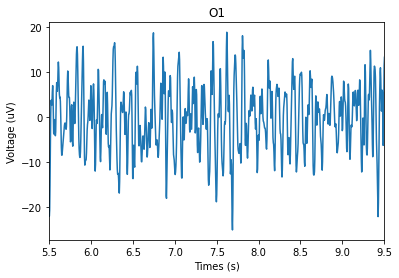

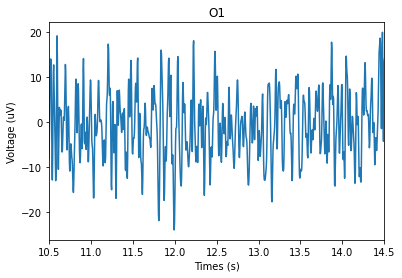

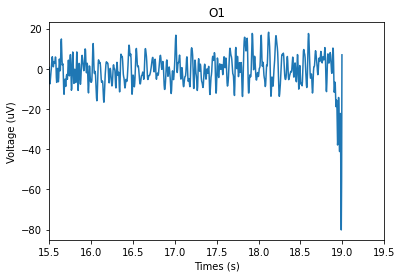

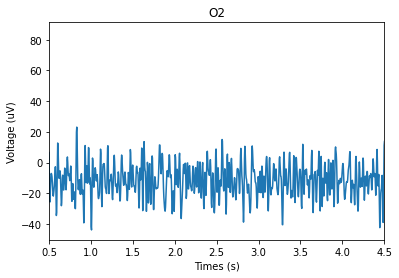

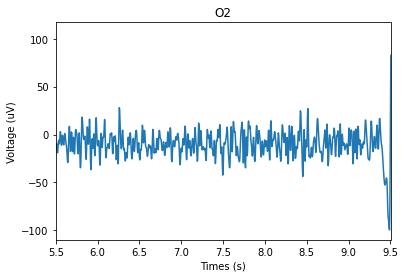

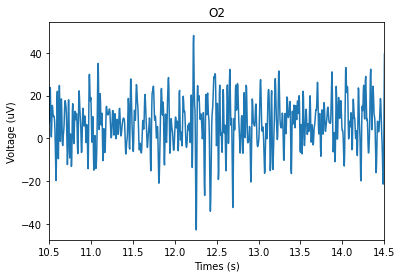

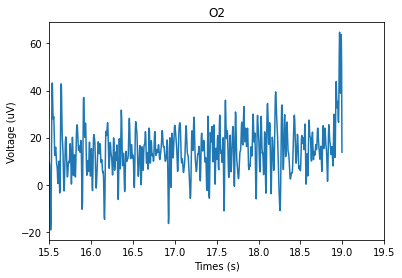

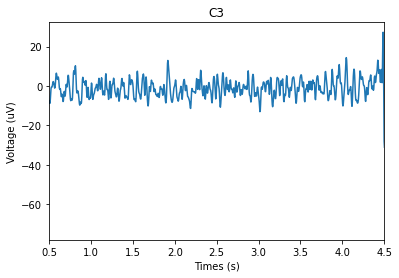

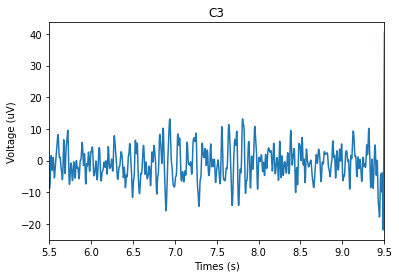

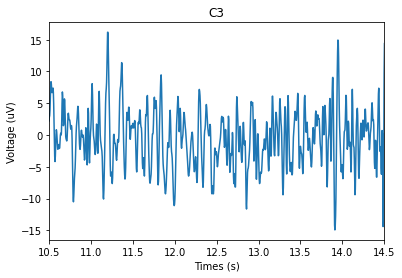

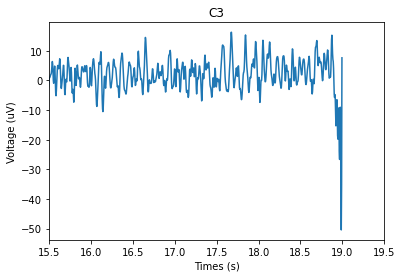

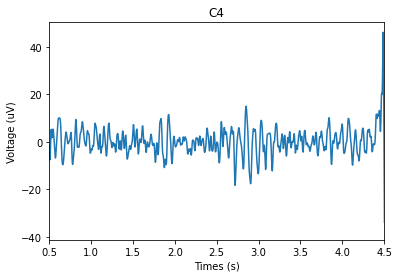

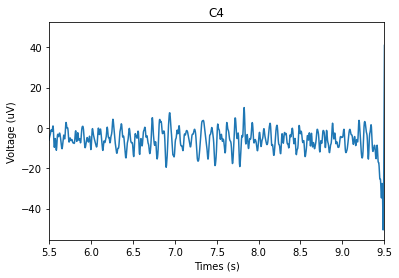

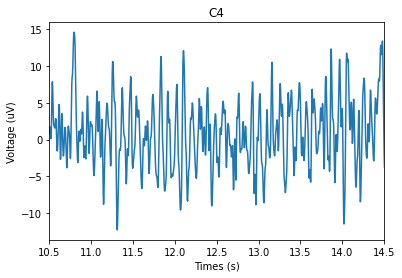

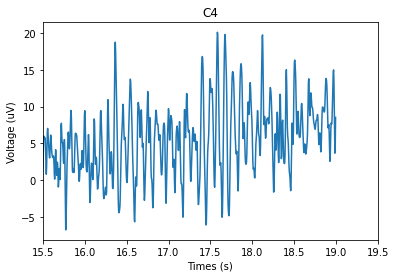

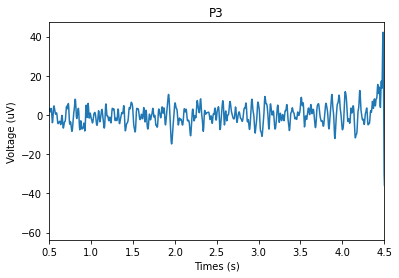

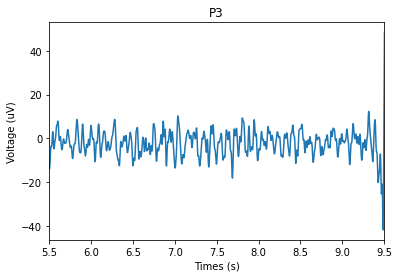

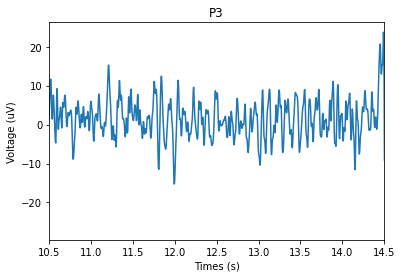

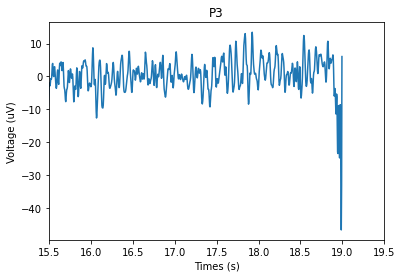

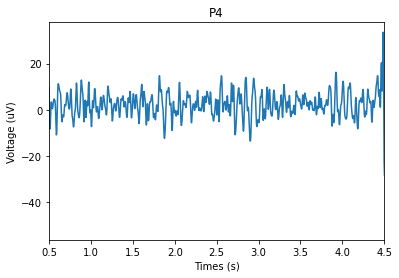

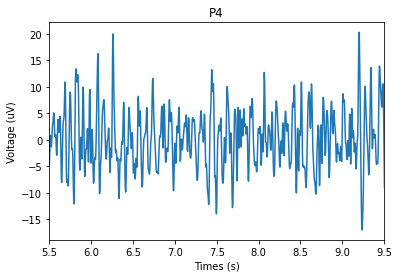

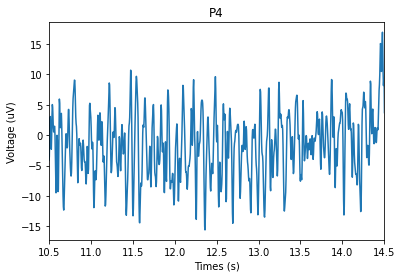

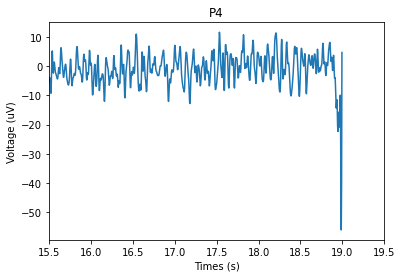

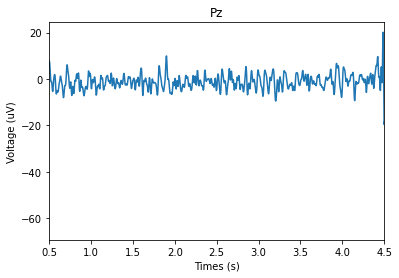

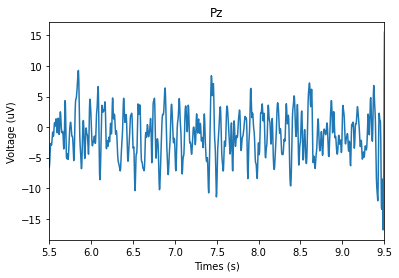

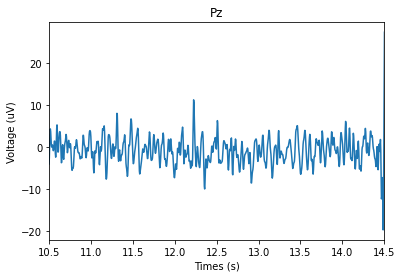

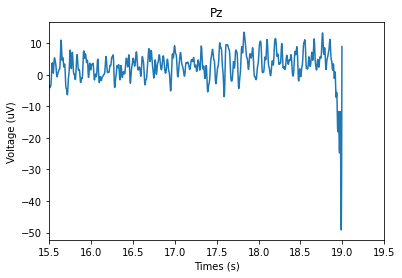

In [16]:
plot_mi(eeg)

In [13]:
freqs, ps = power_spectrum(eeg, 250)

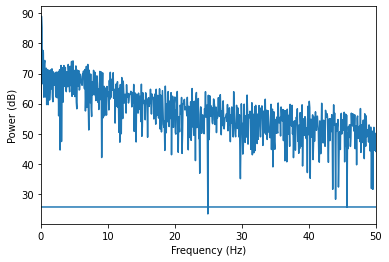

In [14]:
plot_power(freqs, ps, 'Fp1', 250, 50)